In [48]:
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Music Caps Datensatz unter anderem verfügbar über Kaggle:

https://www.kaggle.com/datasets/googleai/musiccaps

Librosa ist eine sehr nützliche Library zur Verarbeitung von Musikdaten

https://librosa.org/doc/latest/sequence.html

Andere Datensätze lassen sich zum Beispiel hier finden:

https://paperswithcode.com/datasets

https://www.kaggle.com/datasets/

huggingface ist ein Model-Repository 
Viele Open Source Modelle zu verschiedensten Anwendungen
Zum Beispiel ein Musicgeneration-Model YuE: https://huggingface.co/m-a-p/YuE-s1-7B-anneal-en-cot

https://colab.research.google.com/drive/1FhH3HlN8Ps_Pr9OR6Qcfbfz7utDvICl0?usp=sharing#scrollTo=PhX8wJzIugkh

In [49]:

file_path = "music_data/musiccaps-public.csv"  

try:
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Display the first few rows of the DataFrame to get an overview
    print("First 5 rows of the dataset:")
    print(df.head())

    # Optionally, display some summary statistics
    print("\nSummary Statistics:")
    print(df.describe())

    # Optionally, display information about the DataFrame (data types, missing values)
    print("\nData Information:")
    print(df.info())


except FileNotFoundError:
    print(f"Error: File not found at {file_path}.  Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

First 5 rows of the dataset:
          ytid  start_s  end_s  \
0  -0Gj8-vB1q4       30     40   
1  -0SdAVK79lg       30     40   
2  -0vPFx-wRRI       30     40   
3  -0xzrMun0Rs       30     40   
4  -1LrH01Ei1w       30     40   

                            audioset_positive_labels  \
0                       /m/0140xf,/m/02cjck,/m/04rlf   
1  /m/0155w,/m/01lyv,/m/0342h,/m/042v_gx,/m/04rlf...   
2                                /m/025_jnm,/m/04rlf   
3                                 /m/01g90h,/m/04rlf   
4                                /m/02p0sh1,/m/04rlf   

                                         aspect_list  \
0  ['low quality', 'sustained strings melody', 's...   
1  ['guitar song', 'piano backing', 'simple percu...   
2  ['amateur recording', 'finger snipping', 'male...   
3  ['backing track', 'jazzy', 'digital drums', 'p...   
4  ['rubab instrument', 'repetitive melody on dif...   

                                             caption  author_id  \
0  The low quality record

In [50]:
df['aspect_list'][0]

"['low quality', 'sustained strings melody', 'soft female vocal', 'mellow piano melody', 'sad', 'soulful', 'ballad']"

In [51]:
df

,ytid,start_s,end_s,audioset_positive_labels,aspect_list,caption,author_id,is_balanced_subset,is_audioset_eval
0,-0Gj8-vB1q4,30,40,"/m/0140xf,/m/02cjck,/m/04rlf","['low quality', 'sustained strings melody', 's...",The low quality recording features a ballad so...,4,False,True
1,-0SdAVK79lg,30,40,"/m/0155w,/m/01lyv,/m/0342h,/m/042v_gx,/m/04rlf...","['guitar song', 'piano backing', 'simple percu...",This song features an electric guitar as the m...,0,False,False
2,-0vPFx-wRRI,30,40,"/m/025_jnm,/m/04rlf","['amateur recording', 'finger snipping', 'male...",a male voice is singing a melody with changing...,6,False,True
3,-0xzrMun0Rs,30,40,"/m/01g90h,/m/04rlf","['backing track', 'jazzy', 'digital drums', 'p...",This song contains digital drums playing a sim...,6,False,True
4,-1LrH01Ei1w,30,40,"/m/02p0sh1,/m/04rlf","['rubab instrument', 'repetitive melody on dif...",This song features a rubber instrument being p...,0,False,False
...,...,...,...,...,...,...,...,...,...
5516,zw5dkiklbhE,15,25,"/m/01sm1g,/m/0l14md","['amateur recording', 'percussion', 'wooden bo...",This audio contains someone playing a wooden b...,6,False,False
5517,zwfo7wnXdjs,30,40,"/m/02p0sh1,/m/04rlf,/m/06j64v","['instrumental music', 'arabic music', 'genera...",The song is an instrumental. The song is mediu...,1,True,True
5518,zx_vcwOsDO4,50,60,"/m/01glhc,/m/02sgy,/m/0342h,/m/03lty,/m/04rlf,...","['instrumental', 'no voice', 'electric guitar'...",The rock music is purely instrumental and feat...,2,True,True
5519,zyXa2tdBTGc,30,40,"/m/04rlf,/t/dd00034","['instrumental music', 'gospel music', 'strong...",The song is an instrumental. The song is slow ...,1,False,False


In [52]:
df.ytid

0       -0Gj8-vB1q4
1       -0SdAVK79lg
2       -0vPFx-wRRI
3       -0xzrMun0Rs
4       -1LrH01Ei1w
           ...     
5516    zw5dkiklbhE
5517    zwfo7wnXdjs
5518    zx_vcwOsDO4
5519    zyXa2tdBTGc
5520    zzNdwF40ID8
Name: ytid, Length: 5521, dtype: object

In [53]:
def load_wav_by_ytid(ytid, wav_dir='music_data/music_data'):
    """
    Loads a .wav file based on the ytid, returning the audio data as a numpy array.

    Args:
        ytid (str): The ytid from the CSV file (without .wav extension).
        wav_dir (str):  The directory containing the .wav files.

    Returns:
        tuple: A tuple containing the audio data as a numpy array (sr,) or (None, None) if the file is not found.
    """
    wav_file_name = f"{ytid}.wav"
    wav_file_path = os.path.join(wav_dir, wav_file_name)  # Construct the full file path

    try:
        audio_data, sample_rate = librosa.load(wav_file_path, sr=None)  # sr=None keeps the original sampling rate
        return audio_data, sample_rate
    except FileNotFoundError:
        print(f"Warning: .wav file not found for ytid: {ytid} at {wav_file_path}")
        return None, None
    except Exception as e:
        print(f"Error loading .wav file for ytid: {ytid} at {wav_file_path}: {e}")
        return None, None

ytid = '_0-2meOf9qY'
audio_data, sample_rate = load_wav_by_ytid(ytid)

In [54]:
audio_data.shape

(958728,)

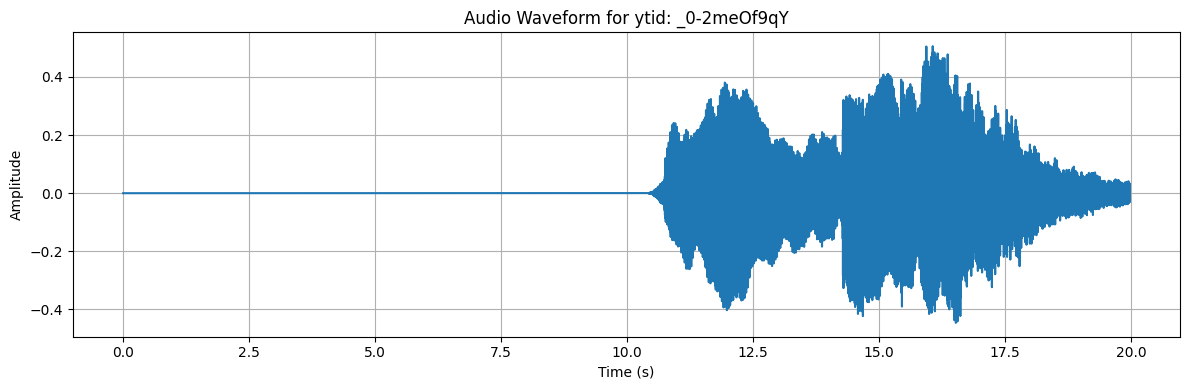

In [55]:
# Create a time axis for the plot

time = np.arange(0, len(audio_data)) / sample_rate

# Plot the audio data
plt.figure(figsize=(12, 4))  # Adjust figure size for better readability
plt.plot(time, audio_data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f"Audio Waveform for ytid: {ytid}")  # More descriptive title
plt.grid(True)  # Add a grid for easier reading
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


### Feature Engineering

In [56]:

# Load audio file
y, sr = librosa.load('music_data/music_data/_0-2meOf9qY.wav', sr=None)  # Replace "audio.wav" with your file

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

print("MFCCs shape:", mfccs.shape)  # Output: (20, number of frames)
print("First MFCC frame:", mfccs[:, 0]) # first frame

# You can further process the MFCCs, e.g., compute the delta (first derivative) and delta-delta (second derivative) features
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

print("Delta MFCCs shape:", delta_mfccs.shape)
print("Delta-delta MFCCs shape:", delta2_mfccs.shape)

MFCCs shape: (20, 1873)
First MFCC frame: [-580.299    0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.   ]
Delta MFCCs shape: (20, 1873)
Delta-delta MFCCs shape: (20, 1873)


In [57]:

# Load audio file
y, sr = librosa.load('music_data/music_data/_0-2meOf9qY.wav', sr=None)

# Calculate the MFCCs with a specified hop_length
hop_length = 1024  # Example hop length
mfccs = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=12) #also specifying number of mfccs here
mfccs.shape

(12, 937)

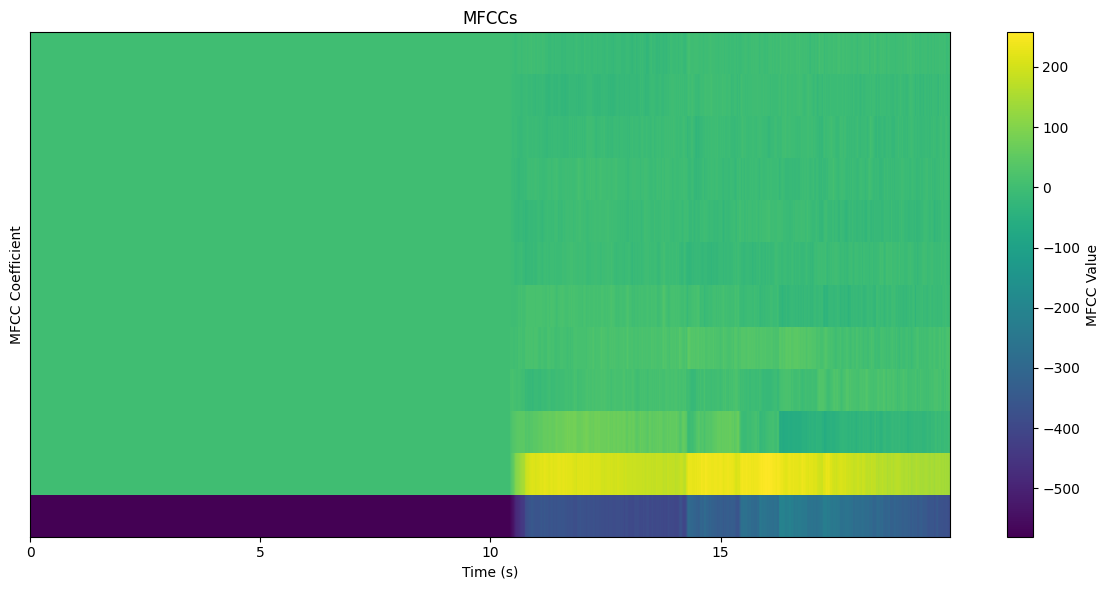

In [58]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
librosa.display.specshow(mfccs,
                         sr=sr,
                         hop_length=hop_length,
                         x_axis='time',
                         cmap='viridis')  # Use a colormap for better visualization
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficient")
plt.colorbar(label="MFCC Value")  # Add a colorbar to show the MFCC values
plt.title("MFCCs")
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
